In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [12]:
df = pd.read_csv('/Users/temp/202406131720_tt.csv')

In [26]:
df.date.max()

'2024-03-31'

In [13]:
df.head()

,id,city_id,date,denominator,numerator
0,a59437ae-8519-11ee-b973-08c0eb32008b,9753f709-b897-4c86-a5d5-bcdacf5677f5,2024-03-12,193,94
1,2f8b1f17-b823-11ed-b109-08c0eb31fffb,721d57f0-89b9-48d0-873f-0d225130f08e,2024-03-03,114,44
2,513bef0e-f4c1-11ed-885e-08c0eb32014b,a3e0f579-3ca4-4b56-8ab4-fe0ce71ee30c,2024-03-06,268,4
3,5ea5e72a-cfe4-11ea-b7de-0050560306e1,efd31898-7035-40e4-87c1-19f53ccfef72,2024-03-19,91,43
4,a30accc2-9d7d-11ee-8861-08c0eb32014b,af32eab3-8a55-40db-abec-42c6fec4f008,2024-03-27,7,0


In [14]:
df.shape

(55770, 5)

In [23]:
#df_active = df[df['date'] >= '2024-04-02']

In [27]:
df_active['ratio'] = df_active.numerator / df_active.denominator

In [72]:
df_active.head()

,id,city_id,date,denominator,numerator,ratio,log_ratio,ratio_strata
0,a59437ae-8519-11ee-b973-08c0eb32008b,9753f709-b897-4c86-a5d5-bcdacf5677f5,2024-03-12,193,94,0.487047,0.396792,High
1,2f8b1f17-b823-11ed-b109-08c0eb31fffb,721d57f0-89b9-48d0-873f-0d225130f08e,2024-03-03,114,44,0.385965,0.326397,Medium-High
2,513bef0e-f4c1-11ed-885e-08c0eb32014b,a3e0f579-3ca4-4b56-8ab4-fe0ce71ee30c,2024-03-06,268,4,0.014925,0.014815,Low
3,5ea5e72a-cfe4-11ea-b7de-0050560306e1,efd31898-7035-40e4-87c1-19f53ccfef72,2024-03-19,91,43,0.472527,0.386980,High
4,a30accc2-9d7d-11ee-8861-08c0eb32014b,af32eab3-8a55-40db-abec-42c6fec4f008,2024-03-27,7,0,0.000000,0.000000,Low


In [82]:
df_active.shape

(55770, 8)

In [81]:
df_active = df_active.drop_duplicates()

In [31]:
df_active.describe()

,denominator,numerator,ratio
count,55770.000000,55770.000000,55632.000000
mean,166.899534,60.774646,0.318612
std,104.303992,57.531230,0.166170
min,0.000000,0.000000,0.000000
25%,91.000000,19.000000,0.196970
50%,151.000000,46.000000,0.312500
75%,225.000000,85.000000,0.431034
max,1010.000000,839.000000,1.000000


In [32]:
c = 1

# Применяем логарифмическое преобразование с добавлением константы c
df_active['log_ratio'] = df_active['ratio'].apply(lambda x: np.log(x + 1))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ratio', ylabel='Count'>

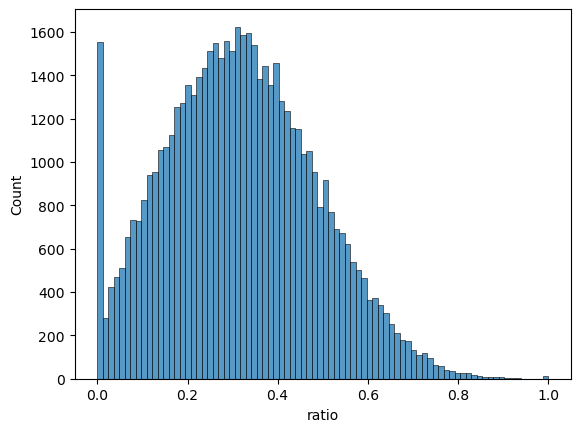

In [78]:
sns.histplot(df_active, x = 'ratio')

In [76]:
data = df_active['ratio']

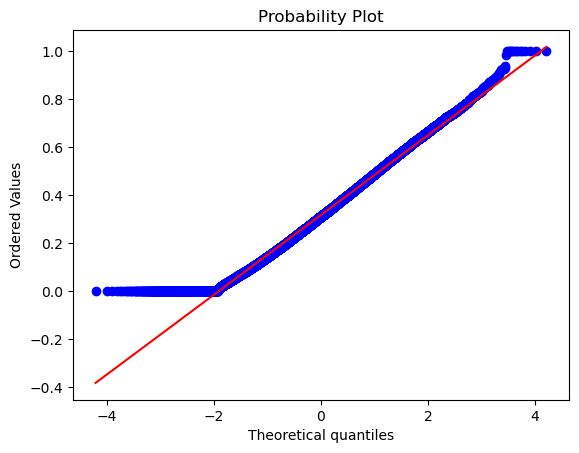

In [77]:
stats.probplot(data, dist="norm", plot=plt)
plt.show()

In [85]:
#Видно, что слева у графика тяжелый конец и линия далека от прямой.
# на нашем распределении сильный перекос в лево, как я и говорил, из-за огромного количества нулевых значений,  
# Я пытался прологарифмировать, но все равно столкнулся с нулевыми значениями.  
# Далее решил использовать в таком случаее тест Манна уитни

In [86]:
df_active = df_active.fillna(0)

In [34]:
# Добавляем новую колонку 'ratio_strata', которая будет содержать интервалы для 'ratio'

# Определяем квантили
quantiles = df_active['ratio'].quantile([0.25, 0.5, 0.75])

# Функция для определения интервала
def assign_strata(row, quantiles):
    if row <= quantiles[0.25]:
        return 'Low'
    elif row <= quantiles[0.5]:
        return 'Medium-Low'
    elif row <= quantiles[0.75]:
        return 'Medium-High'
    else:
        return 'High'

# Применяем функцию к каждому значению 'ratio'
df_active['ratio_strata'] = df_active['ratio'].apply(assign_strata, quantiles=quantiles)

# Теперь 'df' содержит новую колонку 'ratio_strata' с интервалами


In [36]:
df_active.head()

,id,city_id,date,denominator,numerator,ratio,log_ratio,ratio_strata
0,a59437ae-8519-11ee-b973-08c0eb32008b,9753f709-b897-4c86-a5d5-bcdacf5677f5,2024-03-12,193,94,0.487047,0.396792,High
1,2f8b1f17-b823-11ed-b109-08c0eb31fffb,721d57f0-89b9-48d0-873f-0d225130f08e,2024-03-03,114,44,0.385965,0.326397,Medium-High
2,513bef0e-f4c1-11ed-885e-08c0eb32014b,a3e0f579-3ca4-4b56-8ab4-fe0ce71ee30c,2024-03-06,268,4,0.014925,0.014815,Low
3,5ea5e72a-cfe4-11ea-b7de-0050560306e1,efd31898-7035-40e4-87c1-19f53ccfef72,2024-03-19,91,43,0.472527,0.386980,High
4,a30accc2-9d7d-11ee-8861-08c0eb32014b,af32eab3-8a55-40db-abec-42c6fec4f008,2024-03-27,7,0,0.000000,0.000000,Low


In [37]:
quantiles

0.25    0.196970
0.50    0.312500
0.75    0.431034
Name: ratio, dtype: float64

In [49]:
# Группируем данные по 'city_id' и 'ratio_strata' - это и есть наша система сплитования
grouped = df_active.groupby(['city_id', 'ratio_strata'])

# Создаем список для хранения результатов
ab_test_groups_list = []

# Для каждой группы случайно разделяем дарксторы на группы А и В
for name, group in grouped:
    group = group.copy()  # Создаем копию, чтобы избежать предупреждения SettingWithCopyWarning
    group['AB_group'] = 'A'  # Сначала присваиваем всем значение 'A'
    # Случайно выбираем половину дарксторов для группы 'B'
    b_sample = group.sample(frac=0.5, random_state=1)
    group.loc[b_sample.index, 'AB_group'] = 'B'
    # Добавляем обработанную группу в список
    ab_test_groups_list.append(group)

# Объединяем все группы в один DataFrame
ab_test_groups = pd.concat(ab_test_groups_list, ignore_index=True)

In [50]:
ab_test_groups

,id,city_id,date,denominator,numerator,ratio,log_ratio,ratio_strata,AB_group
0,4fa8d3c4-2f8b-11ee-885f-08c0eb32014b,05a6b500-0ffd-46d3-907a-556f7ddc86e5,2024-03-02,183,81,0.442623,0.366463,High,A
1,4fa8d3c4-2f8b-11ee-885f-08c0eb32014b,05a6b500-0ffd-46d3-907a-556f7ddc86e5,2024-03-18,106,47,0.443396,0.366999,High,A
2,0c154cca-3c23-11ee-885f-08c0eb32014b,05a6b500-0ffd-46d3-907a-556f7ddc86e5,2024-03-03,152,73,0.480263,0.392220,High,B
3,4fa8d3c4-2f8b-11ee-885f-08c0eb32014b,05a6b500-0ffd-46d3-907a-556f7ddc86e5,2024-03-29,200,89,0.445000,0.368109,High,B
4,8e470f23-473e-11ee-b971-08c0eb32008b,05a6b500-0ffd-46d3-907a-556f7ddc86e5,2024-03-09,86,56,0.651163,0.501480,High,A
...,...,...,...,...,...,...,...,...,...
55734,2e36d407-013a-11ee-ae78-08c0eb320147,f917f6d1-3e66-4d12-a5ca-381048d9c6a7,2024-03-03,41,11,0.268293,0.237672,Medium-Low,B
55735,583c813e-ac77-11ed-ae77-08c0eb320147,f917f6d1-3e66-4d12-a5ca-381048d9c6a7,2024-03-13,40,8,0.200000,0.182322,Medium-Low,B
55736,583c813e-ac77-11ed-ae77-08c0eb320147,f917f6d1-3e66-4d12-a5ca-381048d9c6a7,2024-03-19,69,18,0.260870,0.231802,Medium-Low,B
55737,583c813e-ac77-11ed-ae77-08c0eb320147,f917f6d1-3e66-4d12-a5ca-381048d9c6a7,2024-03-01,105,28,0.266667,0.236389,Medium-Low,A


In [53]:
ab_test_groups = ab_test_groups.fillna(0)

In [54]:
# Разделяем данные на группы A и B
group_a = ab_test_groups[ab_test_groups['AB_group'] == 'A']['ratio']
group_b = ab_test_groups[ab_test_groups['AB_group'] == 'B']['ratio']

In [79]:
# Выполняем тест Манна-Уитни
u_statistic, p_value = stats.mannwhitneyu(group_a, group_b, alternative='two-sided')

# Выводим результаты
print(f'U-статистика: {u_statistic}')
print(f'P-значение: {p_value}')

# Интерпретация результатов
if p_value < 0.05:
    print('Есть статистически значимые различия между выборками.')
else:
    print('Нет статистически значимых различий между выборками.')

U-статистика: 387902015.0
P-значение: 0.811715744156799
Нет статистически значимых различий между выборками.
